In [1]:
import sys
sys.path.append("/Users/david/Documents/mastersCode/ubm")
print(sys.path)

['/Users/david/Documents/mastersCode/ubm/classifiers/gmm_ubm/development', '/Users/david/.conda/envs/ubm/lib/python310.zip', '/Users/david/.conda/envs/ubm/lib/python3.10', '/Users/david/.conda/envs/ubm/lib/python3.10/lib-dynload', '', '/Users/david/.conda/envs/ubm/lib/python3.10/site-packages', '/Users/david/Documents/mastersCode/ubm']


In [3]:
# test for gmm-ubm on whale calls
from importlib import reload
import audio_datastore.audio_datastore as myads
reload(myads)
from collections import Counter

In [4]:
datasetFolder = r"/Users/david/Documents/mastersCode/ubm/whale/setup/data_spliced"
ads = myads.AudioDatastore()
ads.populate(datasetFolder,include_sub_folders=True, label_source=True)
Counter(ads.labels).values()
adsTest, adsTrain = myads.split(ads, 5)
adsEnroll, adsTrain = myads.split(adsTrain, 8)
adsTrain, _ = myads.split(adsTrain, 15)
adsNorm, _ = myads.split(ads, 27)

In [11]:
import feature_extraction.mfcc.fe_mfcc as fe_mfcc
import feature_extraction.fe_base as fe_base
import classifiers.classifier_base as classifier_base
import classifiers.gmm_ubm.classifier_gmm_ubm as classifier_gmm_ubm
reload(fe_base)
reload(fe_mfcc)
reload(classifier_base)
reload(classifier_gmm_ubm)

<module 'classifiers.gmm_ubm.classifier_gmm_ubm' from '/Users/david/Documents/mastersCode/ubm/classifiers/gmm_ubm/classifier_gmm_ubm.py'>

training for:  FeatureExtractorMFCC
enrolling for  FeatureExtractorMFCC
testing for  FeatureExtractorMFCC


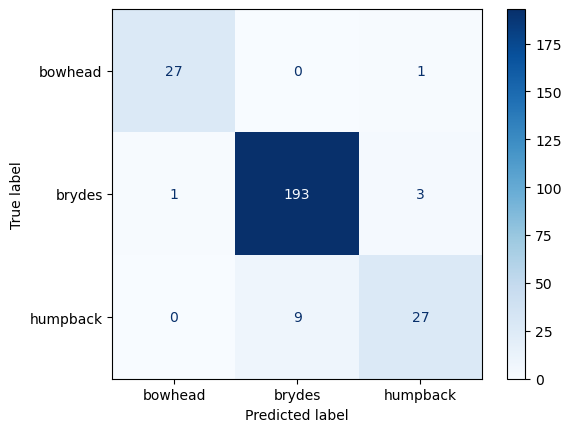

training for:  FeatureExtractorMFCCDelta
enrolling for  FeatureExtractorMFCCDelta
testing for  FeatureExtractorMFCCDelta


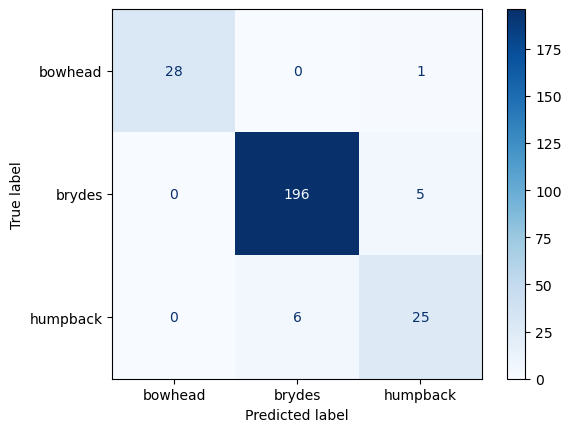

training for:  FeatureExtractorMFCCDeltaDeltas
enrolling for  FeatureExtractorMFCCDeltaDeltas
testing for  FeatureExtractorMFCCDeltaDeltas


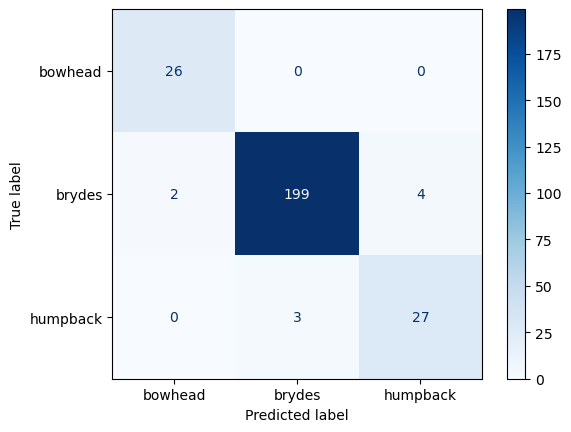

training for:  FeatureExtractorGFCC
enrolling for  FeatureExtractorGFCC
testing for  FeatureExtractorGFCC


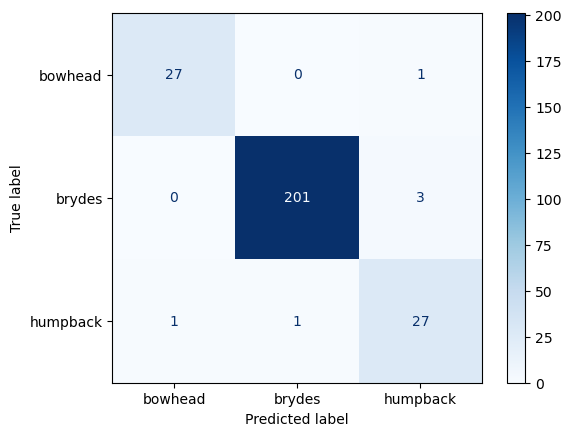

training for:  FeatureExtractorGFCCDelta
enrolling for  FeatureExtractorGFCCDelta
testing for  FeatureExtractorGFCCDelta


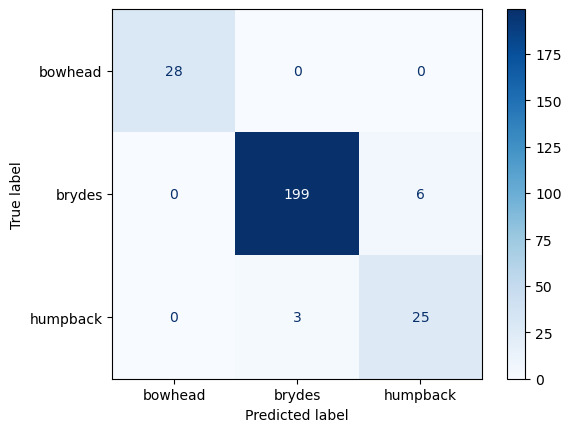

training for:  FeatureExtractorGFCCDeltaDeltas
enrolling for  FeatureExtractorGFCCDeltaDeltas
testing for  FeatureExtractorGFCCDeltaDeltas


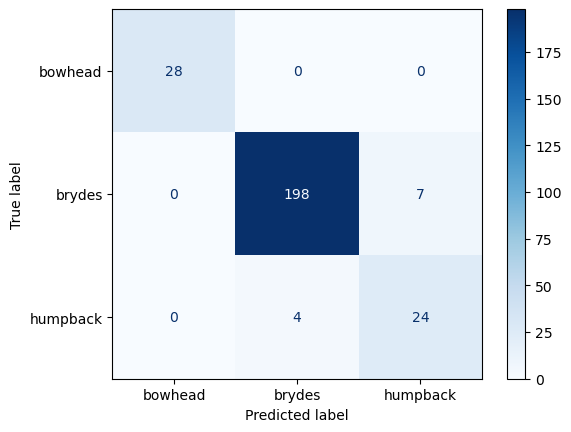

In [13]:
fe_methods = [
    fe_mfcc.FeatureExtractorMFCC(),
    fe_mfcc.FeatureExtractorMFCCDelta(),
    fe_mfcc.FeatureExtractorMFCCDeltaDeltas(),
    fe_mfcc.FeatureExtractorGFCC(),
    fe_mfcc.FeatureExtractorGFCCDelta(),
    fe_mfcc.FeatureExtractorGFCCDeltaDeltas()
]

classifiers = {}
for fe_method in fe_methods:
    classifier = classifier_gmm_ubm.ClassifierGMMUBM(fe_method)
    classifier.get_normalisation(adsNorm)
    classifier.train(adsTrain)
    classifier.enroll(adsEnroll)
    classifier.test(ads)
    classifiers[fe_method.__str__()] = classifier

'FeatureExtractorMFCC'

TypeError: 'module' object is not subscriptable